Nama : Ahmad Fariz Gustav

NIM : 2311110012

In [23]:
#import dataset diabetes
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head(10) #menampilkan 10 baris pertama

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1
5,5.0,116.0,74.0,0.0,NaN,25.6,0.201,30.0,0
6,3.0,78.0,50.0,32.0,88.0,NaN,0.248,26.0,1
7,10.0,115.0,NaN,0.0,0.0,35.3,NaN,29.0,0
8,NaN,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1


In [24]:
df.isnull().sum() #mengidentifikasi missing value

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


# 1.  Imputasi missing value dengan mean, median, dan modus


In [48]:
df['Pregnancies'] = df['Pregnancies'].fillna(df['Pregnancies'].median())  #mengganti dengan median
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())  #mengganti dengan mean
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].fillna(df['DiabetesPedigreeFunction'].mean())
df['Age'] = df['Age'].fillna(df['Age'].median())

print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# 2. Cek korelasi antar variabel dengan heatmap

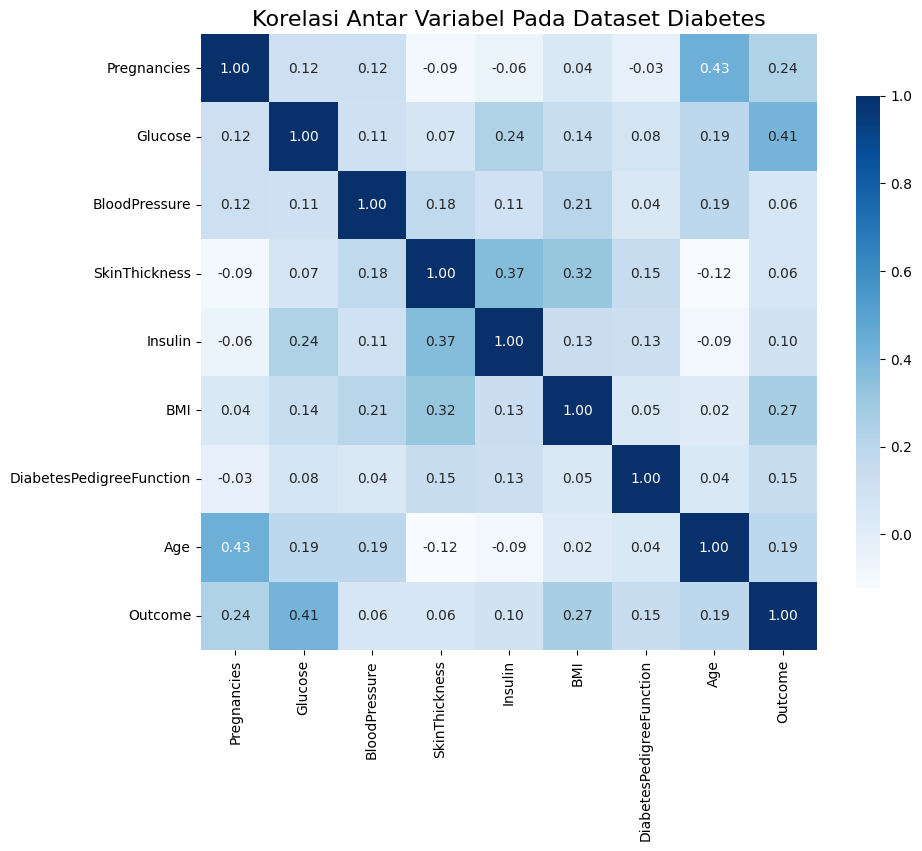

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_correlation_heatmap(data):
    plt.figure(figsize=(10, 8))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', square=True, cbar_kws={"shrink": .8})
    plt.title('Korelasi Antar Variabel Pada Dataset Diabetes', fontsize=16)
    plt.show()

plot_correlation_heatmap(df)


# 3. Lakukan imbalance handling dengan undersampling

In [77]:
# Memeriksa distribusi kelas target
print(df['Outcome'].value_counts())


Outcome
0    500
1    268
Name: count, dtype: int64


In [84]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Inisialisasi RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print(y_res.value_counts())


Outcome
0    268
1    268
Name: count, dtype: int64


#4. Lakukan scaling dengan robust scaler dan minmax

In [87]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# mixmax scaler
min_max_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[df_minmax_scaled.columns] = min_max_scaler.fit_transform(df)

# Robust scaler
robust_scaler = RobustScaler()
df_robust_scaled = df.copy()
df_robust_scaled[df_robust_scaled.columns] = robust_scaler.fit_transform(df)

In [91]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,120.462481,72.000000,35.0,0.0,31.99368,0.627000,33.166124,1
1,1.0,85.000000,66.000000,29.0,0.0,31.99368,0.351000,31.000000,0
2,8.0,183.000000,64.000000,0.0,0.0,23.30000,0.672000,32.000000,1
3,1.0,89.000000,66.000000,23.0,94.0,28.10000,0.167000,21.000000,0
4,0.0,120.462481,40.000000,35.0,168.0,43.10000,0.465363,33.000000,1
5,5.0,116.000000,74.000000,0.0,36.0,25.60000,0.201000,30.000000,0
6,3.0,78.000000,50.000000,32.0,88.0,31.99368,0.248000,26.000000,1
7,10.0,115.000000,68.959283,0.0,0.0,35.30000,0.465363,29.000000,0
8,3.0,197.000000,70.000000,45.0,543.0,30.50000,0.158000,53.000000,1
9,8.0,125.000000,96.000000,0.0,0.0,0.00000,0.232000,54.000000,1
